In [21]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('Scrapper/final.csv', header=None)
df.rename(columns={0: 'comment', 1: 'category'}, inplace=True)

In [23]:
# df.head()
df.category.unique()

array(['positive', 'suggestion', 'question', 'other', 'correction',
       'negative'], dtype=object)

In [24]:
df['category_id'] = df['category'].factorize()[0]
df.head()

,comment,category,category_id
0,Love you sir!!,positive,0
1,Please make videos on..Midpoint circle drawing...,suggestion,1
2,I bought both of your courses on Udemy. You ar...,question,2
3,"Thank you very much, u really got me in the fi...",positive,0
4,i hope u are ok with everything going on again...,other,3


In [25]:
# print(df[df.isna().any(axis=1)])
df.isnull().sum()

comment        0
category       0
category_id    0
dtype: int64

In [26]:
df.shape

(1206, 3)

In [27]:
# preprocessing
import re

# lowercasing
df['comment'] = df['comment'].str.lower()

# removing urls
df['comment'] = df['comment'].str.replace('http\S+|www.\S+', '', case=False)

# removing new lines "\n"
df['comment'] = df['comment'].replace('\n','', regex=True)

# # removing all the punctuations
# df["comment"] = df['comment'].str.replace('[^\w\s]',' ')

# removing integers
df['comment'] = df['comment'].replace('\d','', regex=True)

# removing emojis
df['comment'] = df['comment'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
df

,comment,category,category_id
0,love you sir,positive,0
1,please make videos on..midpoint circle drawing...,suggestion,1
2,i bought both of your courses on udemy. you ar...,question,2
3,"thank you very much, u really got me in the fi...",positive,0
4,i hope u are ok with everything going on again...,other,3
...,...,...,...
1201,what is the purpose of writing main function,question,2
1202,your teaching skill is awesome,positive,0
1203,we can use online compiler to run a program..t...,question,2
1204,c programs can be compiled in browser and that...,question,2


In [28]:
# removing punctuations except ! and ?
import string

def remove_punctuations(text):
    
    punct = string.punctuation
    punct = punct.replace('!', '')
    punct = punct.replace('?', '')
    
    for punctuation in punct:
        text = text.replace(punctuation, '')
    return text

df["comment"] = df['comment'].apply(remove_punctuations)
df

,comment,category,category_id
0,love you sir,positive,0
1,please make videos onmidpoint circle drawing a...,suggestion,1
2,i bought both of your courses on udemy you are...,question,2
3,thank you very much u really got me in the fir...,positive,0
4,i hope u are ok with everything going on again...,other,3
...,...,...,...
1201,what is the purpose of writing main function,question,2
1202,your teaching skill is awesome,positive,0
1203,we can use online compiler to run a programthe...,question,2
1204,c programs can be compiled in browser and that...,question,2


In [29]:
# replacing sequence of "!" with single "!"
def replace(string, char): 
    pattern = char + '{2,}'
    string = re.sub(pattern, char, string)
    return string 

char = '!'

for index, row in df.iterrows():
    df = df.append({'comment':replace(row['comment'], char), 'category':row['category']}, ignore_index=True)
df

,comment,category,category_id
0,love you sir,positive,0.0
1,please make videos onmidpoint circle drawing a...,suggestion,1.0
2,i bought both of your courses on udemy you are...,question,2.0
3,thank you very much u really got me in the fir...,positive,0.0
4,i hope u are ok with everything going on again...,other,3.0
...,...,...,...
2407,what is the purpose of writing main function,question,NaN
2408,your teaching skill is awesome,positive,NaN
2409,we can use online compiler to run a programthe...,question,NaN
2410,c programs can be compiled in browser and that...,question,NaN


In [30]:
# # correcting the typos
# from autocorrect import Speller

# spell = Speller(lang='en')

# def typo_corrector(text):
#     return spell(text)

# df['comment'] = df['comment'].apply(typo_corrector)
# df

In [31]:
# stemming
import nltk

stemmer = nltk.stem.SnowballStemmer('english')
def stem_text(text):
    return stemmer.stem(text)

df['comment'] = df['comment'].apply(stem_text)


# lemmatizing
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return lemmatizer.lemmatize(text)

df['comment'] = df['comment'].apply(lemmatize_text)
df

,comment,category,category_id
0,love you sir,positive,0.0
1,please make videos onmidpoint circle drawing a...,suggestion,1.0
2,i bought both of your courses on udemy you are...,question,2.0
3,thank you very much u really got me in the fir...,positive,0.0
4,i hope u are ok with everything going on again...,other,3.0
...,...,...,...
2407,what is the purpose of writing main funct,question,NaN
2408,your teaching skill is awesome,positive,NaN
2409,we can use online compiler to run a programthe...,question,NaN
2410,c programs can be compiled in browser and that...,question,NaN


In [32]:
# category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
# category_to_id = dict(category_id_df.values)
# id_to_category = dict(category_id_df[['category_id', 'category']].values)
# df.head()

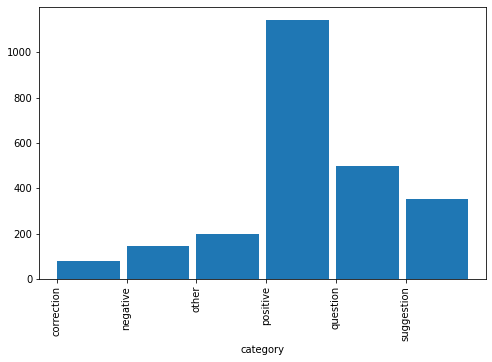

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
df.groupby('category').comment.count().plot.bar(align='edge', width=0.9)
plt.show()

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=0.1, norm='l2', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.comment).toarray()
labels = df.category_id
features.shape

(2412, 3)

In [41]:
# from sklearn.feature_selection import chi2
# import numpy as np
# N = 2

# for Product, category_id in sorted(category_to_id.items()):
#     features_chi2 = chi2(features, labels == category_id)
#     indices = np.argsort(features_chi2[0])
#     feature_names = np.array(tfidf.get_feature_names())[indices]
#     unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#     bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#     print("# '{}':".format(Product))
#     print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#     print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

In [42]:
# # visualizing
# import seaborn as sns
# sns.lmplot('comment', df, hue='Class', fit_reg=False)
# fig = plt.gcf()
# fig.set_size_inches(15, 10)
# plt.show()


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['category_id'], random_state = 0)

In [39]:
# print(clf.predict(count_vect.transform(["please upload"])))



In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

cv_df = pd.DataFrame()
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=10)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=10, jitter=True, linewidth=1)
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
cv_df.index

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

In [ ]:
# model = LinearSVC()

# X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# from sklearn.metrics import confusion_matrix

# conf_mat = confusion_matrix(y_test, y_pred)
# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

In [ ]:
# from IPython.display import display

# for predicted in category_id_df.category_id:
#   for actual in category_id_df.category_id:
#     if predicted != actual and conf_mat[actual, predicted] >= 10:
#       print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
#       display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['category', 'comment']])
#       print('')

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['category'].unique()))